In [39]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [40]:
df=pd.read_csv("C:\\End-2\\src\\notebook\\data\\stud.csv")

In [41]:
df

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95
996,male,group C,high school,free/reduced,none,62,55,55
997,female,group C,high school,free/reduced,completed,59,71,65
998,female,group D,some college,standard,completed,68,78,77


In [42]:
df.head(5)

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [43]:
df.isnull().sum()

gender                         0
race_ethnicity                 0
parental_level_of_education    0
lunch                          0
test_preparation_course        0
math_score                     0
reading_score                  0
writing_score                  0
dtype: int64

In [44]:
df.duplicated().sum()

np.int64(0)

In [45]:
df.dtypes

gender                         object
race_ethnicity                 object
parental_level_of_education    object
lunch                          object
test_preparation_course        object
math_score                      int64
reading_score                   int64
writing_score                   int64
dtype: object

In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race_ethnicity               1000 non-null   object
 2   parental_level_of_education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test_preparation_course      1000 non-null   object
 5   math_score                   1000 non-null   int64 
 6   reading_score                1000 non-null   int64 
 7   writing_score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [47]:
df.describe()

,math_score,reading_score,writing_score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


In [48]:
df.nunique()

gender                          2
race_ethnicity                  5
parental_level_of_education     6
lunch                           2
test_preparation_course         2
math_score                     81
reading_score                  72
writing_score                  77
dtype: int64

In [49]:
for col in df.columns:
    if df[col].dtype=="object":
        print(col)

gender
race_ethnicity
parental_level_of_education
lunch
test_preparation_course


In [50]:
df['gender'].unique()

array(['female', 'male'], dtype=object)

In [51]:
df['race_ethnicity'].unique()

array(['group B', 'group C', 'group A', 'group D', 'group E'],
      dtype=object)

In [52]:
df['parental_level_of_education'].unique()

array(["bachelor's degree", 'some college', "master's degree",
       "associate's degree", 'high school', 'some high school'],
      dtype=object)

In [53]:
df['lunch'].unique()

array(['standard', 'free/reduced'], dtype=object)

In [54]:
df['test_preparation_course'].unique()

array(['none', 'completed'], dtype=object)

In [55]:
numerical_features=[col for col in df.columns if df[col].dtype!="object"]
categorical_features=[col for col in df.columns if df[col].dtype=="object"]

In [56]:
numerical_features

['math_score', 'reading_score', 'writing_score']

In [57]:
categorical_features

['gender',
 'race_ethnicity',
 'parental_level_of_education',
 'lunch',
 'test_preparation_course']

In [58]:
df['total_score']=df['math_score']+df['reading_score']+df['writing_score']
df['average']=df['total_score']/3

In [59]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,total_score,average
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333


In [60]:
reading_full=df.loc[df['reading_score']==100]['average'].count()
writing_full=df.loc[df['writing_score']==100]['average'].count()
math_full=df.loc[df['math_score']==100]['average'].count()


In [61]:
print(f"Number of students with full marks in Maths:{math_full}")
print(f"Number of students with full marks in writing:{writing_full}")
print(f"Number of students with full marks in reading:{reading_full}")

Number of students with full marks in Maths:7
Number of students with full marks in writing:14
Number of students with full marks in reading:17


<Axes: xlabel='average', ylabel='Count'>

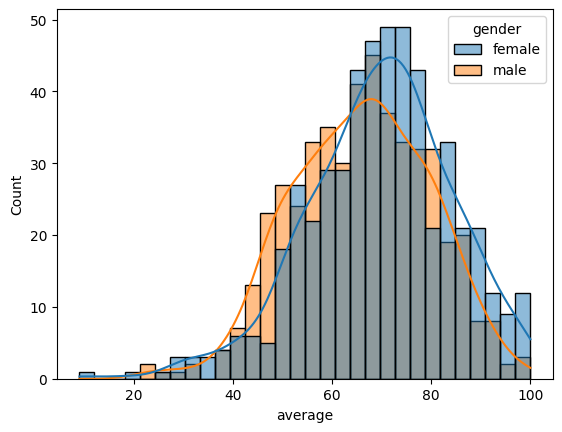

In [62]:
sns.histplot(df,x="average",bins=30,kde=True,hue="gender")

<Axes: xlabel='total_score', ylabel='Count'>

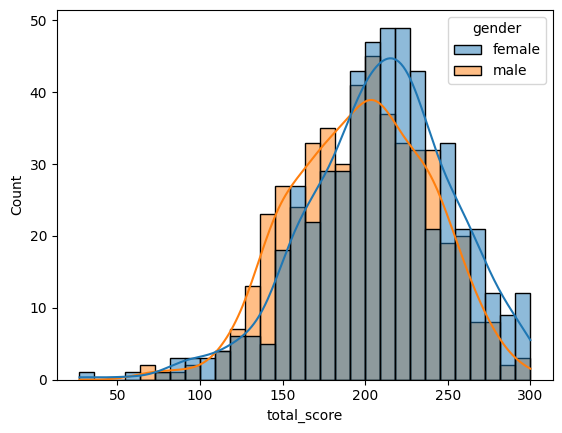

In [63]:
sns.histplot(df,x="total_score",bins=30,kde=True,hue="gender")

In [64]:
#Female students tend to perform better than male students

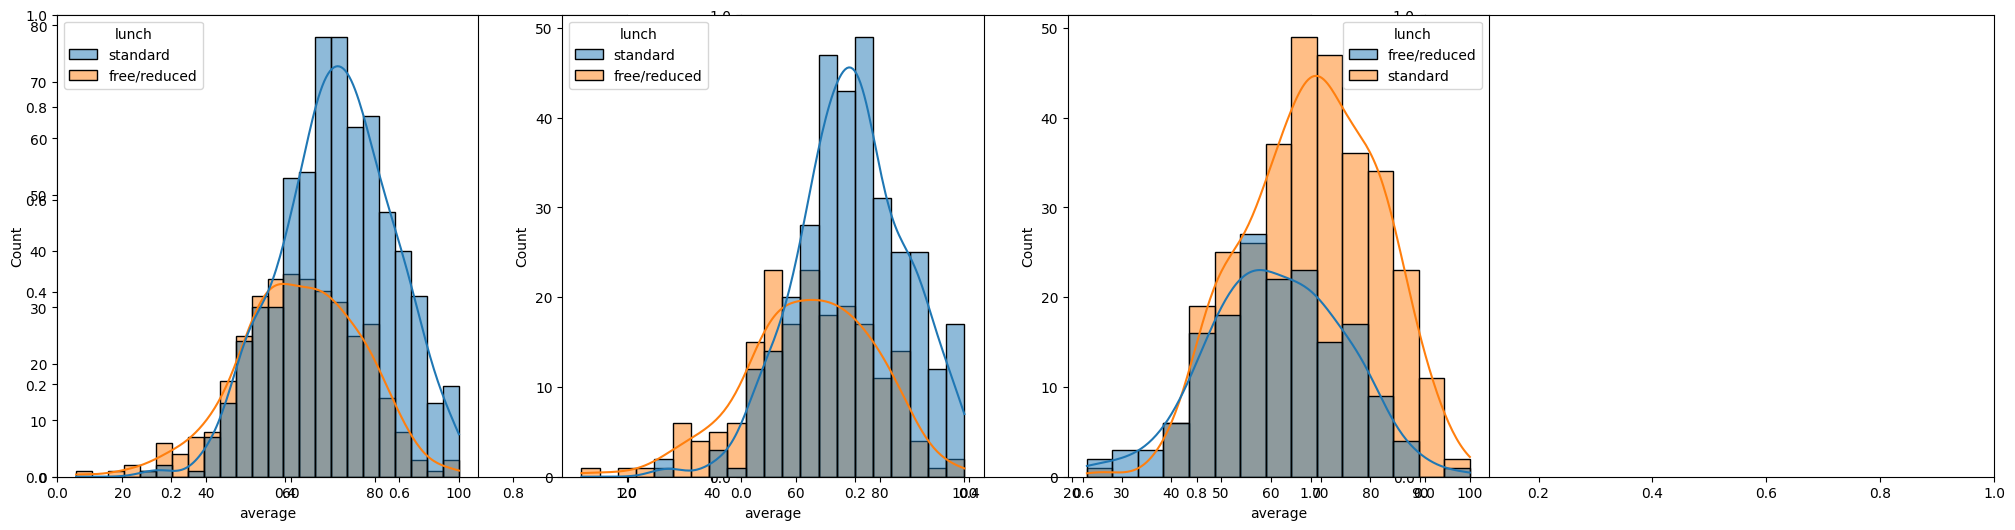

In [72]:
plt.subplots(1,3,figsize=(25,6))
plt.subplot(141)
sns.histplot(data=df,x='average',kde=True,hue='lunch')
plt.subplot(142)
sns.histplot(data=df[df.gender=='female'],x='average',kde=True,hue='lunch')
plt.subplot(143)
sns.histplot(data=df[df.gender=='male'],x='average',kde=True,hue='lunch')
plt.show()

- Standard lunch helps perform well in exams.
- Standard lunch helps perform well in exams be it a male or a female.

In [76]:
df.columns

Index(['gender', 'race_ethnicity', 'parental_level_of_education', 'lunch',
       'test_preparation_course', 'math_score', 'reading_score',
       'writing_score', 'total_score', 'average'],
      dtype='object')

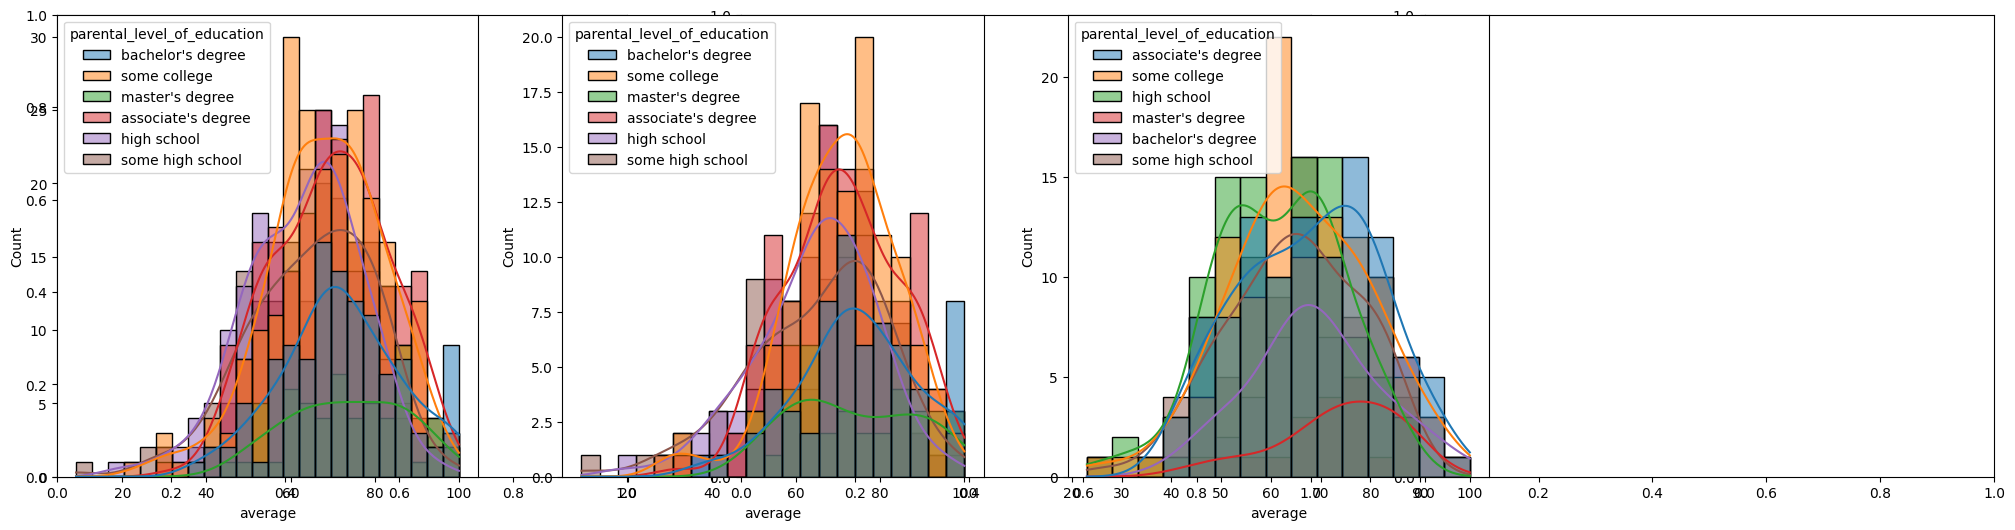

In [77]:
plt.subplots(1,3,figsize=(25,6))
plt.subplot(141)
sns.histplot(data=df,x='average',kde=True,hue='parental_level_of_education')
plt.subplot(142)
sns.histplot(data=df[df.gender=='female'],x='average',kde=True,hue='parental_level_of_education')
plt.subplot(143)
sns.histplot(data=df[df.gender=='male'],x='average',kde=True,hue='parental_level_of_education')
plt.show()

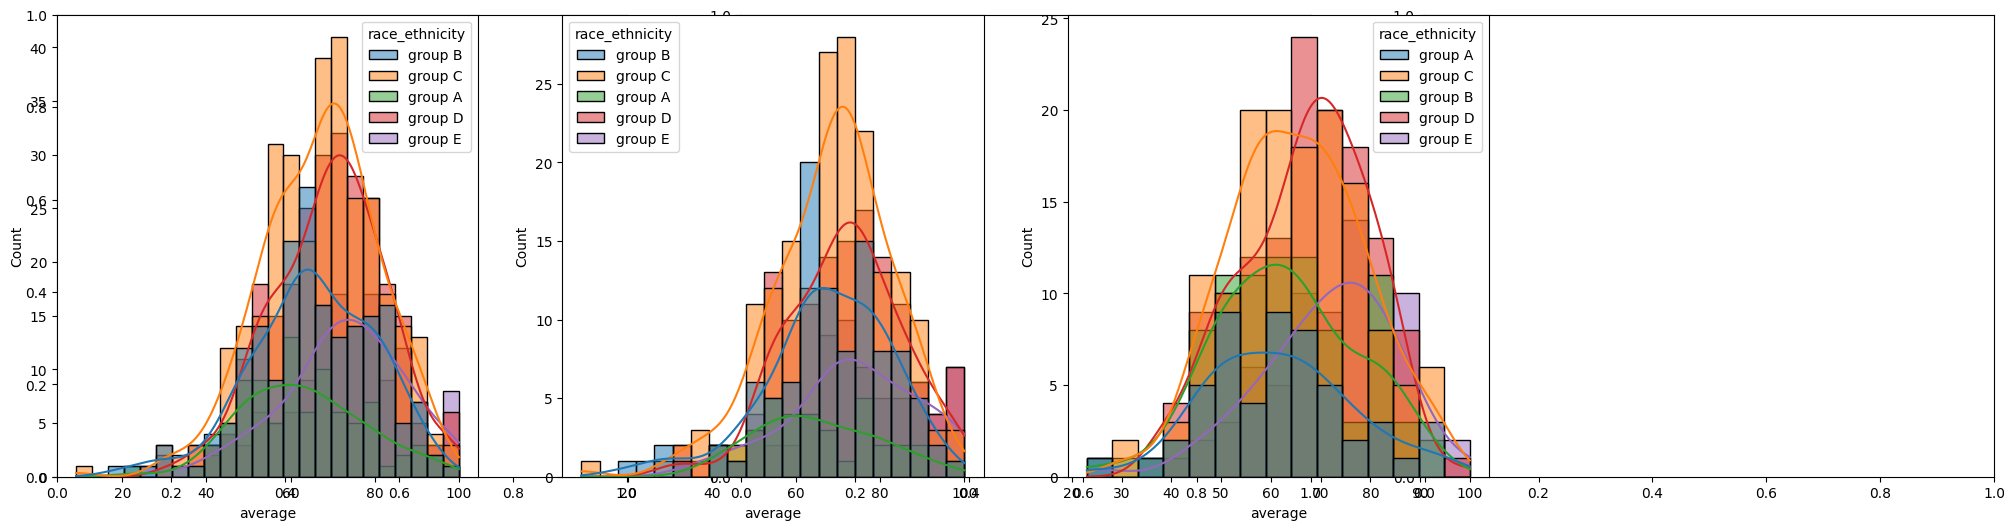

In [78]:
plt.subplots(1,3,figsize=(25,6))
plt.subplot(141)
sns.histplot(data=df,x='average',kde=True,hue='race_ethnicity')
plt.subplot(142)
sns.histplot(data=df[df.gender=='female'],x='average',kde=True,hue='race_ethnicity')
plt.subplot(143)
sns.histplot(data=df[df.gender=='male'],x='average',kde=True,hue='race_ethnicity')
plt.show()

- Students of group A and group E tends to perform poorly in exam.
- Students of group A and group E tends to perform poorly in exam under male
- Students of group A and group E tends to perform poorly in exam under Female


<Axes: title={'center': 'READING_SCORES'}, ylabel='reading_score'>

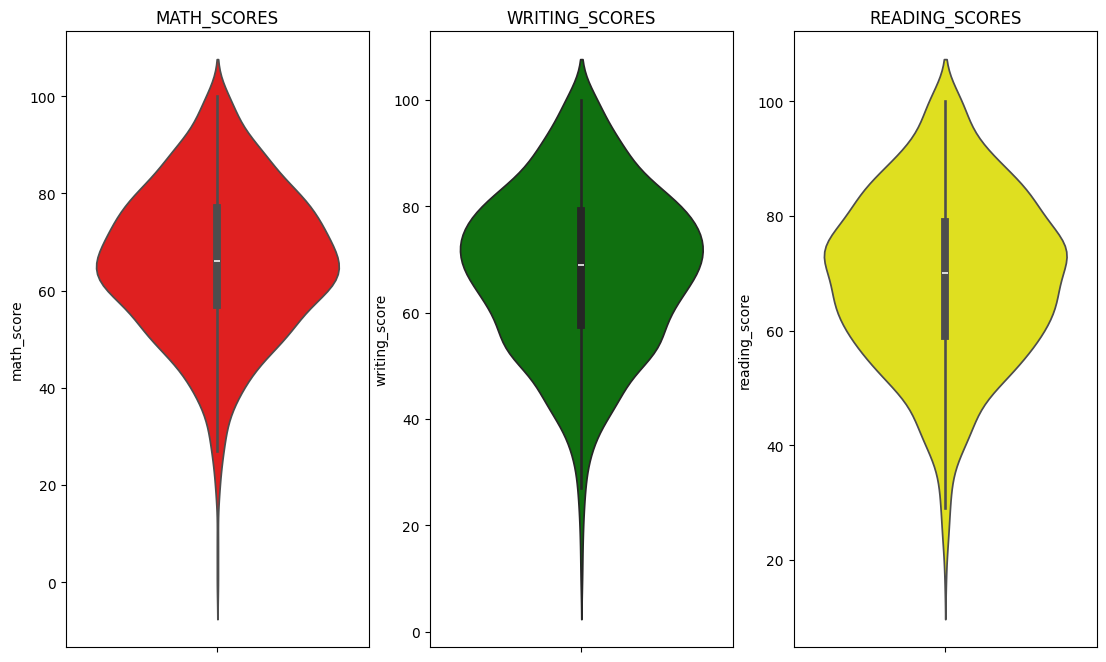

In [84]:
plt.figure(figsize=(18,8))
plt.subplot(1,4,1)
plt.title("MATH_SCORES")
sns.violinplot(data=df,y=df['math_score'],color='red')
plt.subplot(1,4,2)
plt.title("WRITING_SCORES")
sns.violinplot(data=df,y=df['writing_score'],color='green')
plt.subplot(1,4,3)
plt.title("READING_SCORES")
sns.violinplot(data=df,y=df['reading_score'],color='yellow')



- From the above three plots its clearly visible that most of the students score in between 60-80 in Maths whereas in reading and writing most of them score from 50-80

In [85]:
df.columns

Index(['gender', 'race_ethnicity', 'parental_level_of_education', 'lunch',
       'test_preparation_course', 'math_score', 'reading_score',
       'writing_score', 'total_score', 'average'],
      dtype='object')

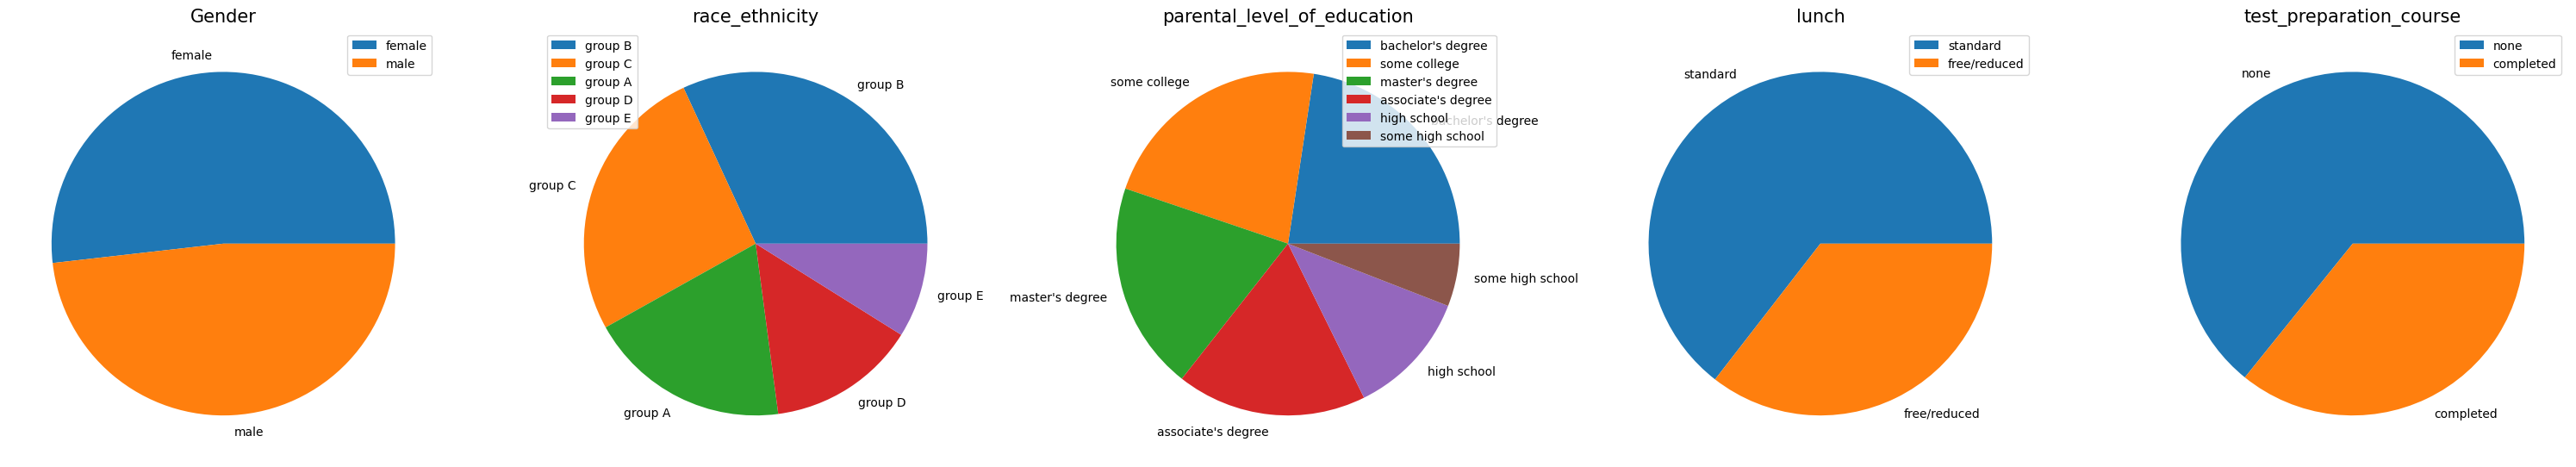

In [99]:
plt.rcParams['figure.figsize'] = (30, 12)

plt.subplot(1,5,1)
size=df['gender'].value_counts()
labels=list(df['gender'].unique())
plt.pie(size,labels=labels)
plt.title('Gender',fontsize=15)
plt.legend()
plt.axis('off')

plt.subplot(1,5,2)
size=df['race_ethnicity'].value_counts()
labels=list(df['race_ethnicity'].unique())
plt.pie(size,labels=labels)
plt.title('race_ethnicity',fontsize=15)
plt.legend()
plt.axis('off')

plt.subplot(1,5,3)
size=df['parental_level_of_education'].value_counts()
labels=list(df['parental_level_of_education'].unique())
plt.pie(size,labels=labels)
plt.title('parental_level_of_education',fontsize=15)
plt.legend()
plt.axis('off')

plt.subplot(1,5,4)
size=df['lunch'].value_counts()
labels=list(df['lunch'].unique())
plt.pie(size,labels=labels)
plt.title('lunch',fontsize=15)
plt.legend()
plt.axis('off')

plt.subplot(1,5,5)
size=df['test_preparation_course'].value_counts()
labels=list(df['test_preparation_course'].unique())
plt.pie(size,labels=labels)
plt.title('test_preparation_course',fontsize=15)
plt.legend()
plt.axis('off')

plt.tight_layout()
plt.show()




